Model Performance:
Root Mean Squared Error: $68078.33
R-squared Score: 0.6636


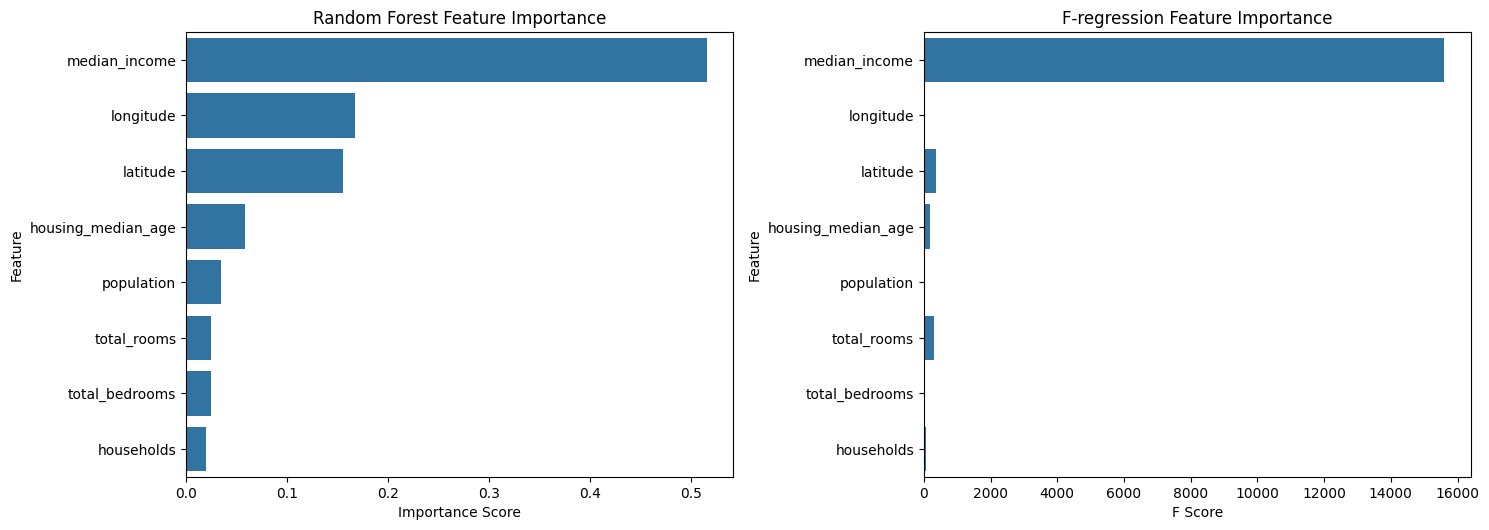

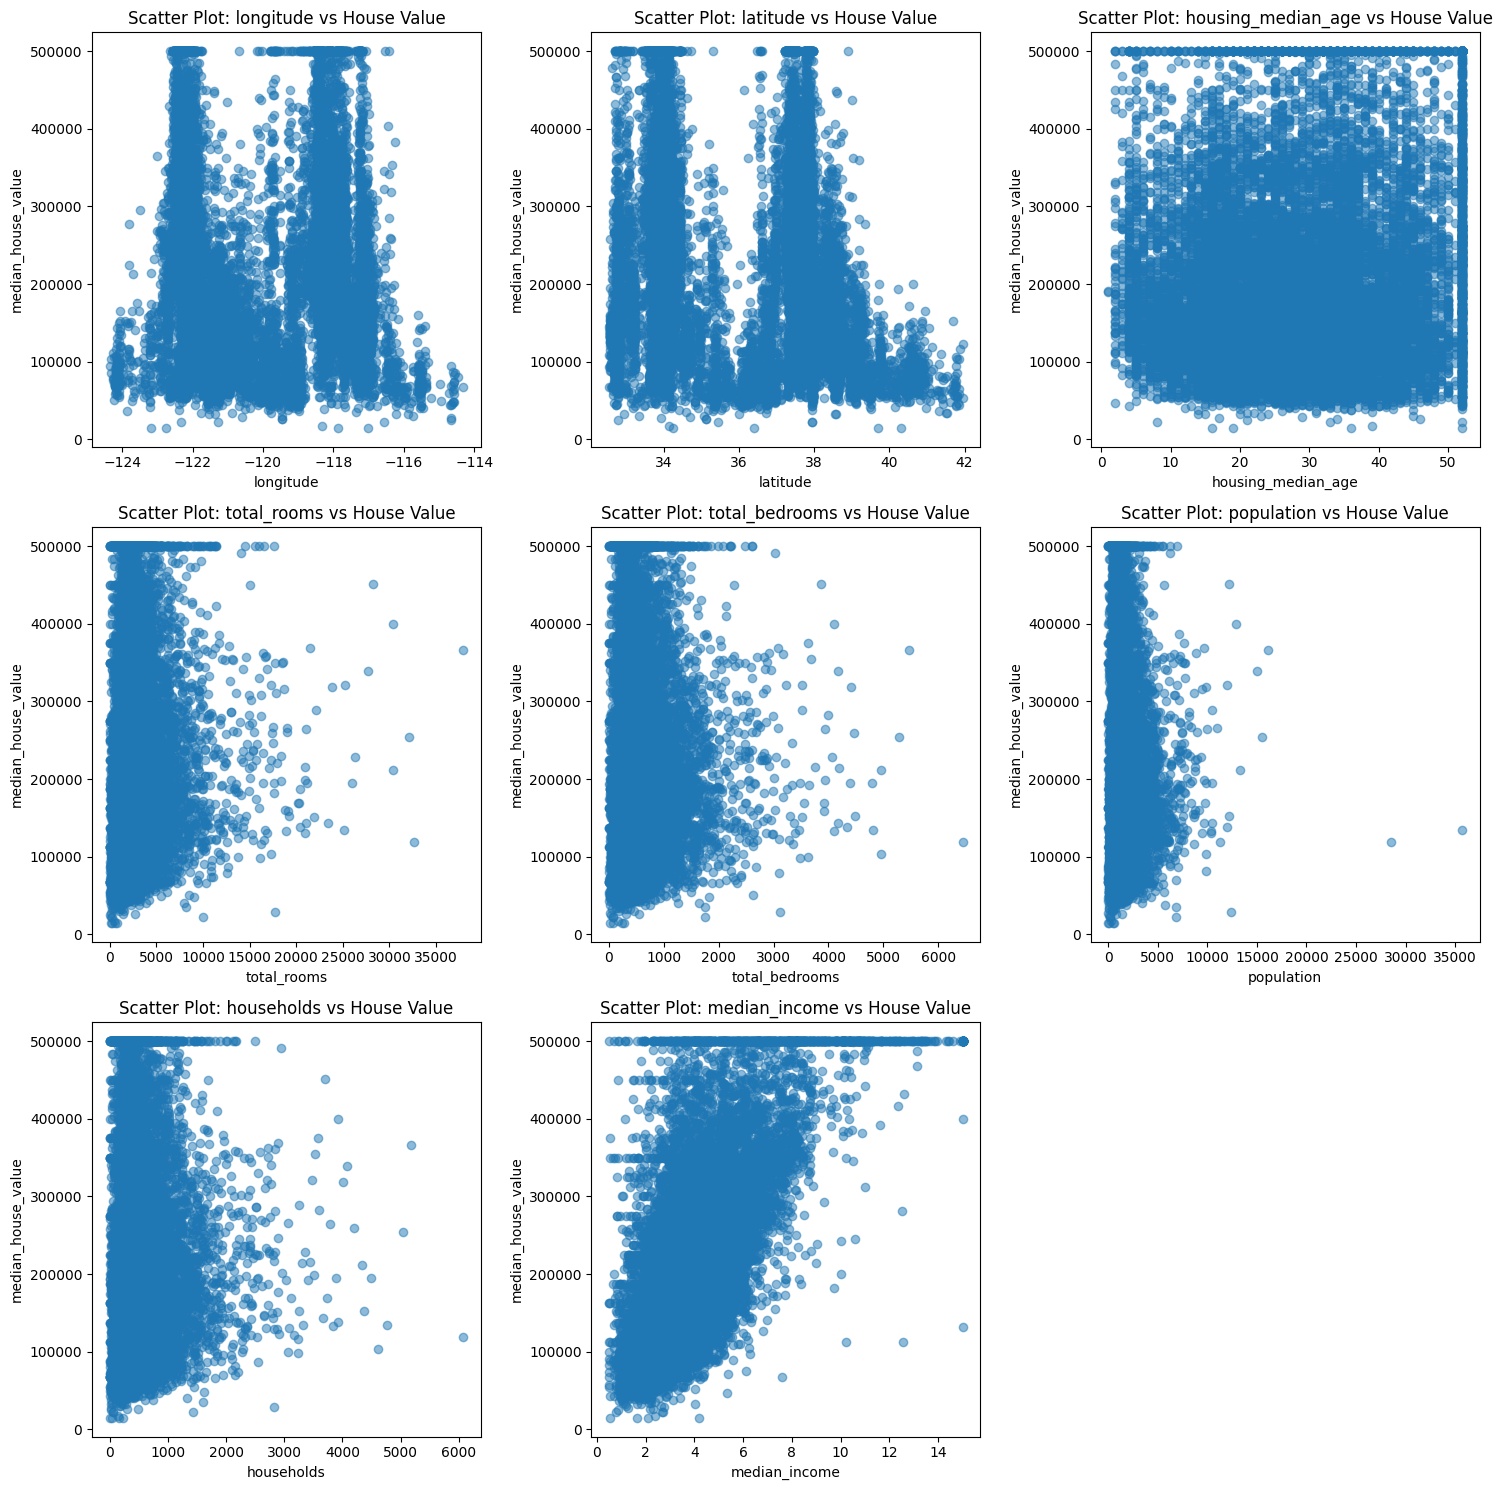

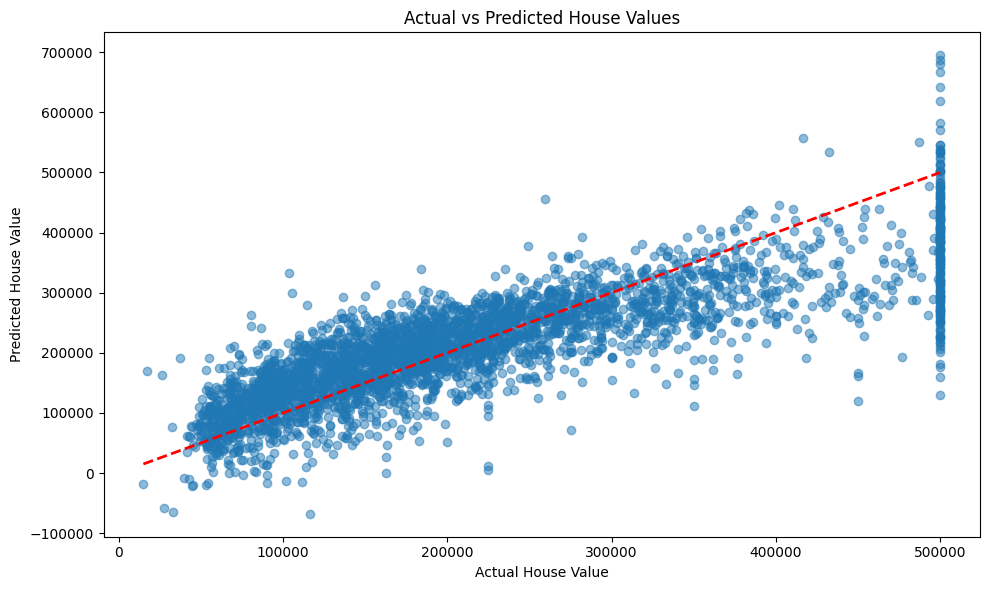


Feature Importance Rankings:
              Feature       F_Score  RF_Importance
7       median_income  15608.001736       0.515105
0           longitude     34.462685       0.167252
1            latitude    364.630076       0.155041
2  housing_median_age    195.963175       0.058206
5          population     13.194323       0.034932
3         total_rooms    296.756652       0.024799
4      total_bedrooms     35.704140       0.024678
6          households     63.549807       0.019987


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Separate features (X) and target variable (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Method 1: SelectKBest with f_regression
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)
f_scores = selector.scores_

# Method 2: Random Forest Feature Importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_importance = rf_model.feature_importances_

# Create feature importance dataframe
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'F_Score': f_scores,
    'RF_Importance': rf_importance
})

# Sort by Random Forest importance
feature_importance = feature_importance.sort_values('RF_Importance', ascending=False)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Root Mean Squared Error: ${rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

# Create subplots for feature importance and scatter plots
plt.figure(figsize=(15, 10))

# Random Forest Feature Importance
plt.subplot(2, 2, 1)
sns.barplot(x='RF_Importance', y='Feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')

# F-regression Feature Importance
plt.subplot(2, 2, 2)
sns.barplot(x='F_Score', y='Feature', data=feature_importance)
plt.title('F-regression Feature Importance')
plt.xlabel('F Score')

plt.tight_layout()
plt.show()

# Create scatter plots for each feature
n_features = len(X.columns)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols
plt.figure(figsize=(15, 5*n_rows))

for i, feature in enumerate(X.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.scatter(X[feature], y, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('median_house_value')
    plt.title(f'Scatter Plot: {feature} vs House Value')

plt.tight_layout()
plt.show()

# Additional scatter plot: Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.title('Actual vs Predicted House Values')
plt.tight_layout()
plt.show()

print("\nFeature Importance Rankings:")
print(feature_importance)

# New Section